<a href="https://colab.research.google.com/github/lizsolano/Optativa_profesionalizante_I/blob/main/BD_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
#!pip install pandas matplotlib seaborn plotly
#!pip install --upgrade pandas seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 3.1. Introducción a Pandas
## 3.1.2. Carga de datos

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/lizsolano/Optativa_profesionalizante_I/main/NetFlix.csv',sep = ',')


In [11]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64


In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...




---


## CONVERSION DE VARIABLES

### date_added

### Nueva sección

In [14]:
print(df['date_added'].head())

0    14-Aug-20
1    15-Dec-17
2     5-Jan-19
3     1-Mar-16
4     3-Dec-18
Name: date_added, dtype: object


In [15]:
# Intentamos convertir directamente, capturando errores
try:
    df['date_added'] = pd.to_datetime(df['date_added'])
except ValueError:
    # Si falla, intentamos con un formato específico
    df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

<ipython-input-15-6749a2b9179f>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


In [17]:
# Verificar el tipo de datos después de la conversión
print(df['date_added'].dtype)

datetime64[ns]


In [18]:
# Mostrar las primeras filas para verificar la conversión
print(df['date_added'].head())

# Si hay valores NaT (Not a Time) después de la conversión, los podemos identificar así:
print(df['date_added'].isna().sum())

0   2020-08-14
1   2017-12-15
2   2019-01-05
3   2016-03-01
4   2018-12-03
Name: date_added, dtype: datetime64[ns]
10


### rating

In [19]:
# Definir un diccionario de mapeo de ratings a valores numéricos
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 1,
    'TV-PG': 2,
    'TV-14': 3,
    'TV-MA': 4
}

In [20]:
# Crear una nueva columna 'rating_numeric' con los valores convertidos
df['rating_numeric'] = df['rating'].map(rating_map)


In [21]:
# Para manejar cualquier rating que no esté en el diccionario, puedes usar un valor predeterminado
# df['rating_numeric'] = df['rating'].map(rating_map).fillna(0)

# Mostrar las primeras filas para verificar la conversión
print(df[['rating', 'rating_numeric']].head())

# Obtener estadísticas básicas de la nueva columna numérica
print(df['rating_numeric'].describe())

  rating  rating_numeric
0  TV-MA             4.0
1  TV-MA             4.0
2  TV-PG             2.0
3      R             4.0
4   TV-G             1.0
count    7685.000000
mean        3.154066
std         0.936116
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating_numeric, dtype: float64


In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2.0
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,4.0
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,1.0


In [24]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,int64




---
# ESTADISTICA


## DESCRIPTIVA

In [26]:
# para variables numéricas
numeric_columns = ['release_year', 'duration', 'rating_numeric']
print("Estadísticas descriptivas para variables numéricas:")
print(df[numeric_columns].describe())

Estadísticas descriptivas para variables numéricas:
       release_year     duration  rating_numeric
count   7787.000000  7787.000000     7685.000000
mean    2013.932580    69.122769        3.154066
std        8.757395    50.950743        0.936116
min     1925.000000     1.000000        1.000000
25%     2013.000000     2.000000        3.000000
50%     2017.000000    88.000000        3.000000
75%     2018.000000   106.000000        4.000000
max     2021.000000   312.000000        5.000000


## MEDIDAS DE TENDENCIA CENTRAL

In [27]:
print("\nMedidas de tendencia central para variables numéricas:")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Media: {df[column].mean():.2f}")
    print(f"Mediana: {df[column].median():.2f}")
    print(f"Moda: {df[column].mode().values[0]:.2f}")


Medidas de tendencia central para variables numéricas:

release_year:
Media: 2013.93
Mediana: 2017.00
Moda: 2018.00

duration:
Media: 69.12
Mediana: 88.00
Moda: 1.00

rating_numeric:
Media: 3.15
Mediana: 3.00
Moda: 4.00


In [28]:
categorical_columns = ['type', 'rating', 'genres']
print("\nEstadísticas para variables categóricas:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())
    print(f"Moda: {df[column].mode().values[0]}")


Estadísticas para variables categóricas:

type:
type
Movie      5377
TV Show    2410
Name: count, dtype: int64
Moda: Movie

rating:
rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64
Moda: TV-MA

genres:
genres
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
British TV Shows, Docuseries, TV Comedies                            1
Horror Movies, International Movies, Sci-Fi & Fantasy                1


In [29]:
# Estadísticas para la columna de fecha
print("\nEstadísticas para la columna de fecha:")
print(f"Fecha más temprana: {df['date_added'].min()}")
print(f"Fecha más reciente: {df['date_added'].max()}")
print(f"Rango de fechas: {df['date_added'].max() - df['date_added'].min()}")


Estadísticas para la columna de fecha:
Fecha más temprana: 2008-01-01 00:00:00
Fecha más reciente: 2021-01-16 00:00:00
Rango de fechas: 4764 days 00:00:00


In [30]:
# Conteo de valores únicos para otras columnas de objeto
object_columns = ['show_id', 'title', 'director', 'cast', 'country', 'description']
print("\nConteo de valores únicos para otras columnas de objeto:")
for column in object_columns:
    print(f"{column}: {df[column].nunique()} valores únicos")


Conteo de valores únicos para otras columnas de objeto:
show_id: 7787 valores únicos
title: 7787 valores únicos
director: 4049 valores únicos
cast: 6831 valores únicos
country: 681 valores únicos
description: 7769 valores únicos


In [31]:
df.describe()

,date_added,release_year,duration,rating_numeric
count,7777,7787.000000,7787.000000,7685.000000
mean,2019-01-02 19:20:57.708627712,2013.932580,69.122769,3.154066
min,2008-01-01 00:00:00,1925.000000,1.000000,1.000000
25%,2018-02-01 00:00:00,2013.000000,2.000000,3.000000
50%,2019-03-08 00:00:00,2017.000000,88.000000,3.000000
75%,2020-01-20 00:00:00,2018.000000,106.000000,4.000000
max,2021-01-16 00:00:00,2021.000000,312.000000,5.000000
std,NaN,8.757395,50.950743,0.936116


In [33]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2.0
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,4.0
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,1.0


In [34]:
### Manejo de datos faltantes y duplicados
df.dropna(subset=['director'], inplace=True)
df.drop_duplicates(inplace=True)



---

# GRAFICOS

## BASICOS

### 1. Histograma de release_year


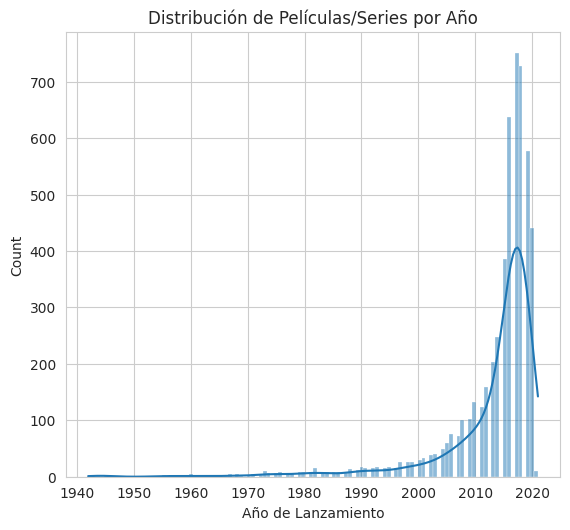

In [56]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['release_year'], kde=True)
plt.title('Distribución de Películas/Series por Año')
plt.xlabel('Año de Lanzamiento')

plt.tight_layout()
plt.show()

### 2. Histograma de duration

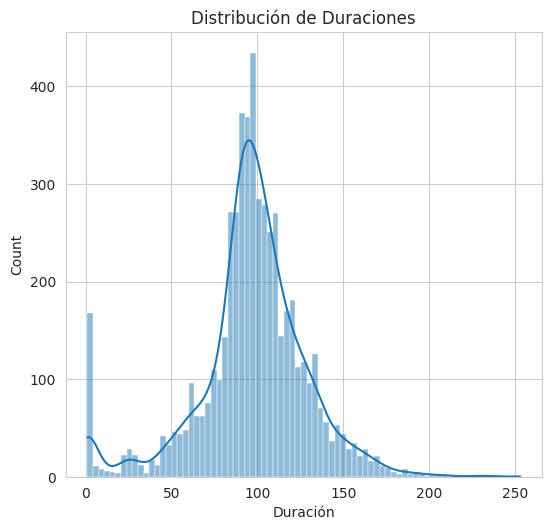

In [57]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 2)
sns.histplot(df['duration'], kde=True)
plt.title('Distribución de Duraciones')
plt.xlabel('Duración')


plt.tight_layout()

plt.show()

### 3. Gráfico de barras de rating

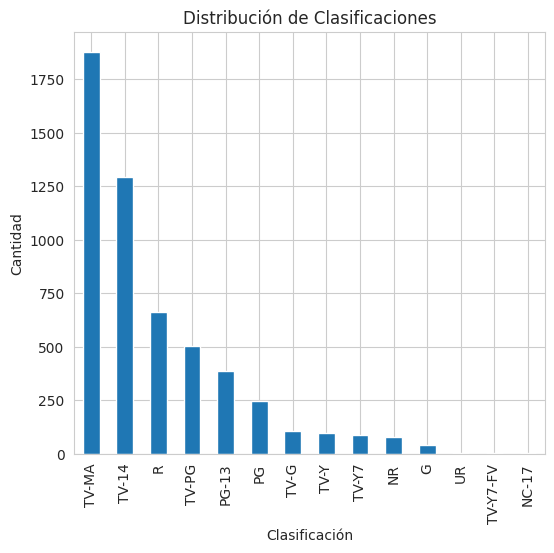

In [58]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 3)
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribución de Clasificaciones')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')


plt.tight_layout()
plt.show()

### 4. Gráfico de pastel de type

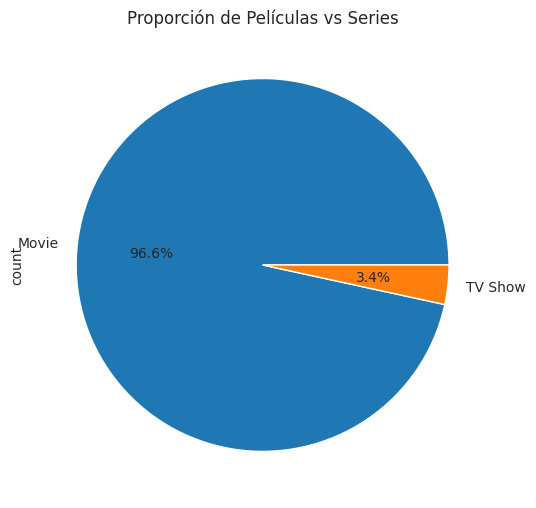

In [59]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 4)
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Películas vs Series')


plt.tight_layout()
plt.show()

### 5. Gráfico de barras de country (top 10)

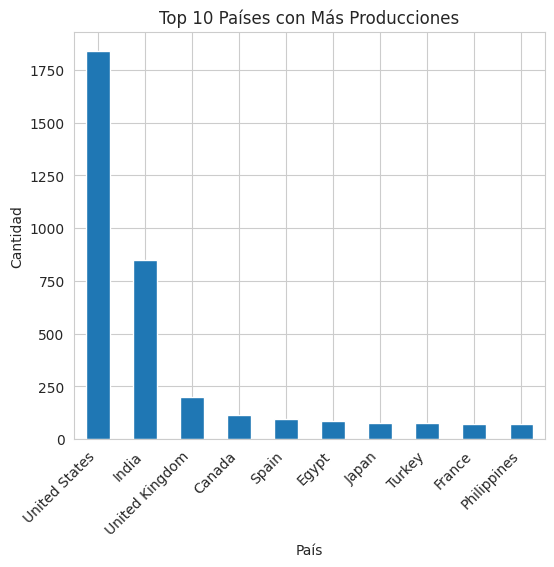

In [60]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 5)
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Países con Más Producciones')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### 6. Gráfico de barras de generos (top 10)

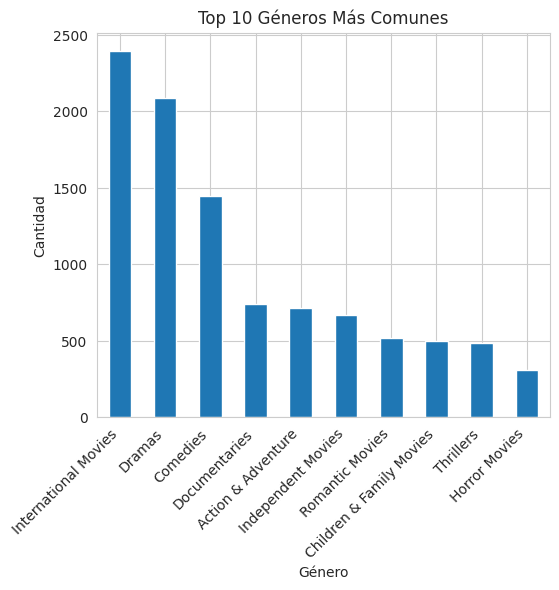

In [61]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['genres'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Géneros Más Comunes')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## AVANZADOS

In [62]:
# Configuración general de estilo
plt.style.use('seaborn')
sns.set_palette("deep")


<ipython-input-62-ae00953e294e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 1. Scatter plot de release_year vs duration

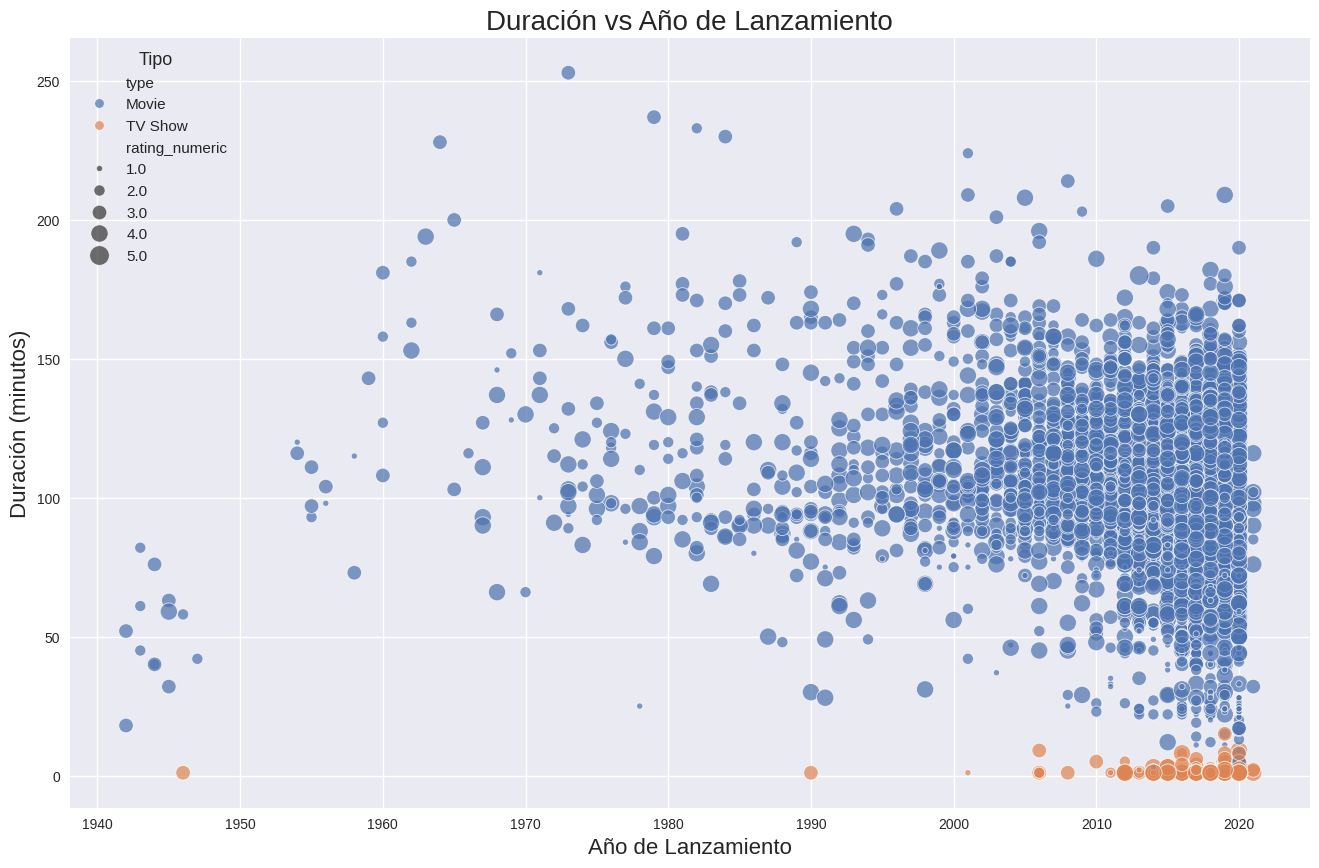

In [63]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x='release_year', y='duration', hue='type', size='rating_numeric', sizes=(20, 200), alpha=0.7)
plt.title('Duración vs Año de Lanzamiento', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=16)
plt.ylabel('Duración (minutos)', fontsize=16)
plt.legend(title='Tipo', title_fontsize='13', fontsize='11')
plt.show()

### 2. Box plot de duración por tipo

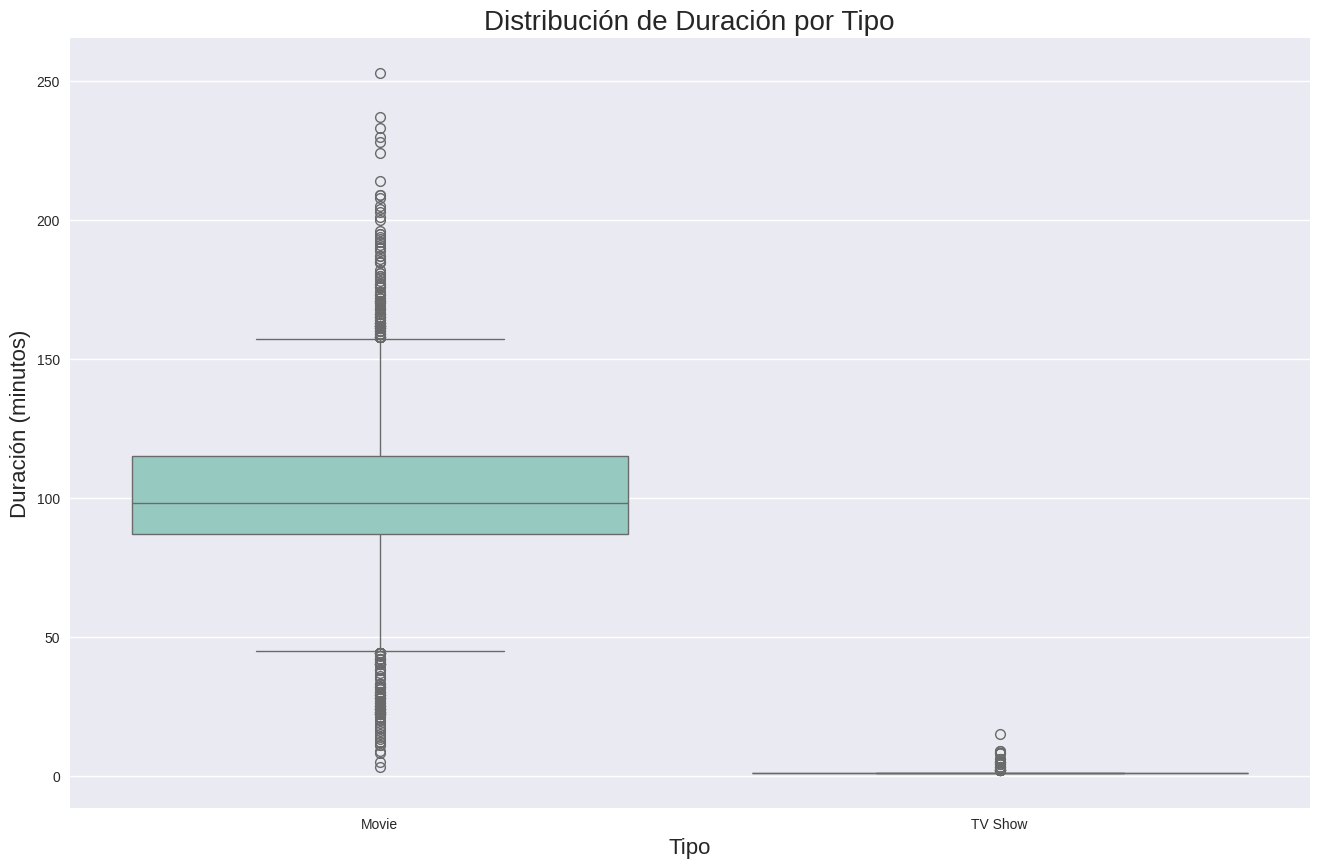

In [90]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='type', y='duration', hue='type', dodge=False, palette='Set3')
plt.title('Distribución de Duración por Tipo', fontsize=20)
plt.xlabel('Tipo', fontsize=16)
plt.ylabel('Duración (minutos)', fontsize=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



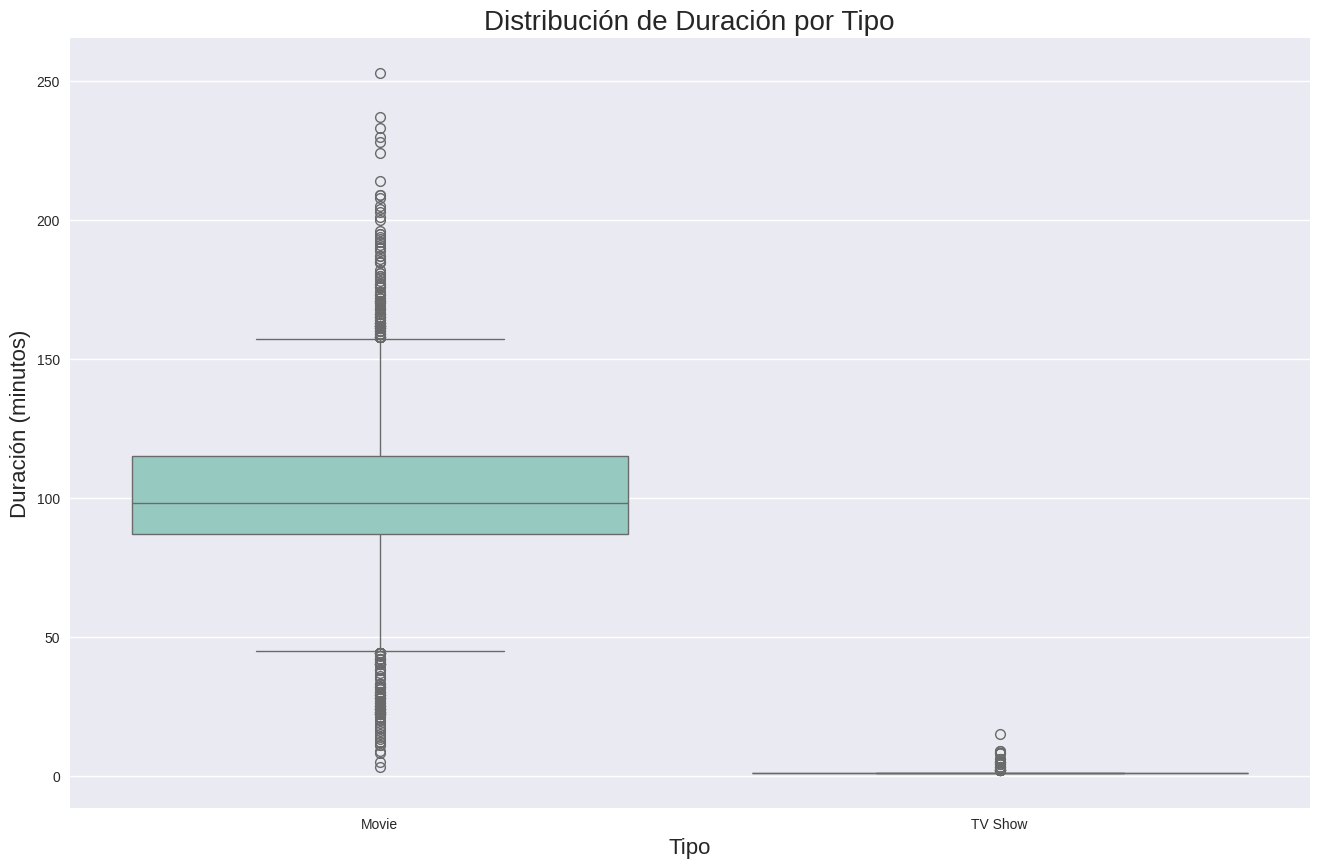

In [87]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='type', y='duration', hue='type', legend=False, palette='Set3')
plt.title('Distribución de Duración por Tipo', fontsize=20)
plt.xlabel('Tipo', fontsize=16)
plt.ylabel('Duración (minutos)', fontsize=16)
plt.show()

### 3. Heatmap de correlación entre variables numéricas

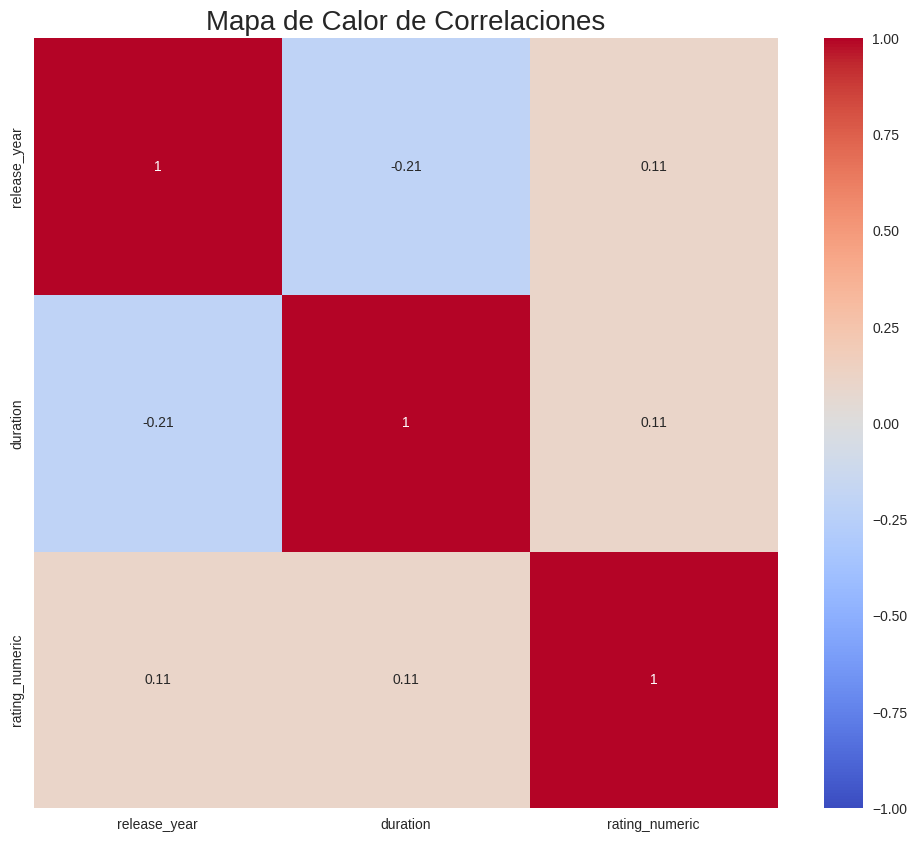

In [65]:
numeric_cols = ['release_year', 'duration', 'rating_numeric']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Mapa de Calor de Correlaciones', fontsize=20)
plt.show()

### 4. Gráfico de líneas para mostrar tendencias de ratings a lo largo de los años

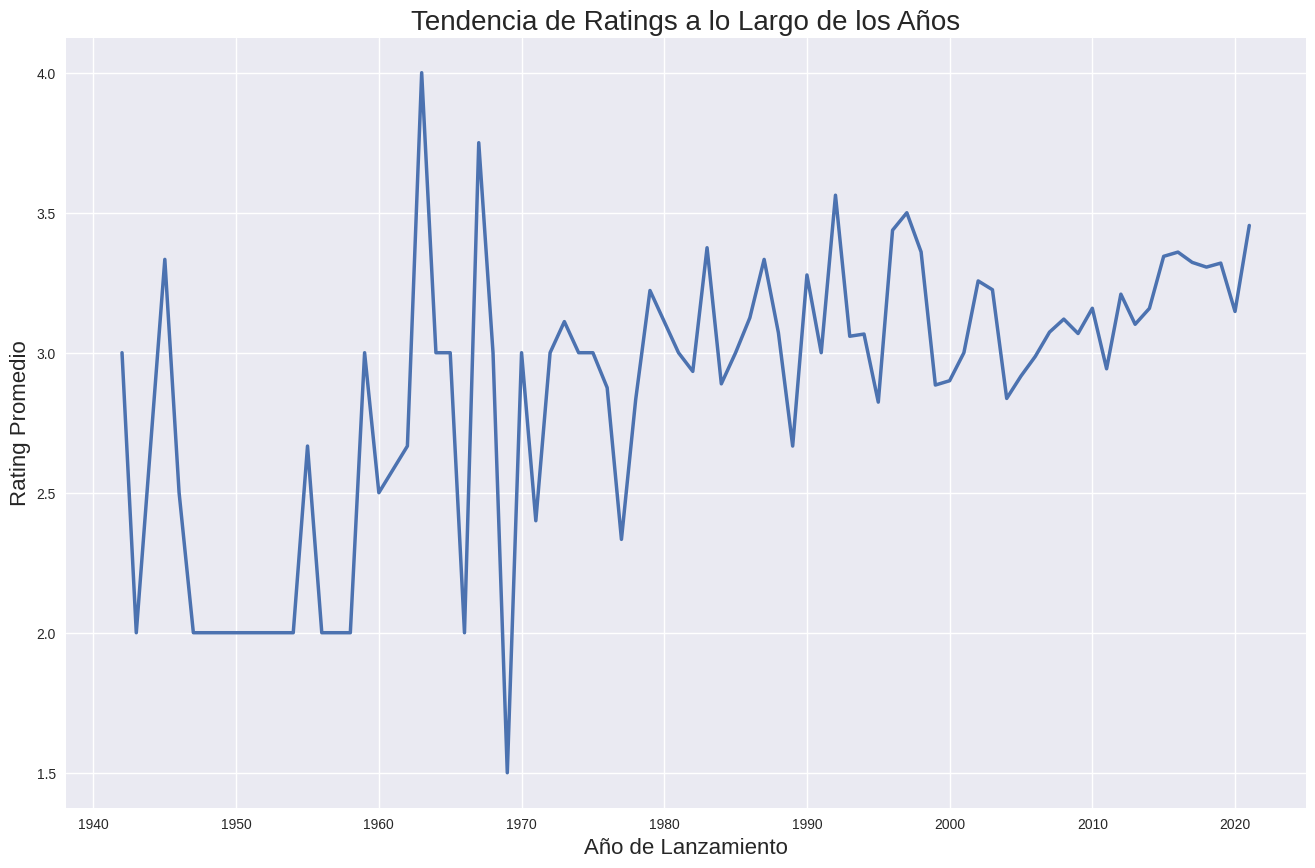

In [66]:
df_ratings = df.groupby('release_year')['rating_numeric'].mean().reset_index()

plt.figure(figsize=(16, 10))
sns.lineplot(data=df_ratings, x='release_year', y='rating_numeric', linewidth=2.5)
plt.title('Tendencia de Ratings a lo Largo de los Años', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=16)
plt.ylabel('Rating Promedio', fontsize=16)
plt.show()

### 5. Gráfico de líneas para mostrar tendencias de géneros a lo largo de los años

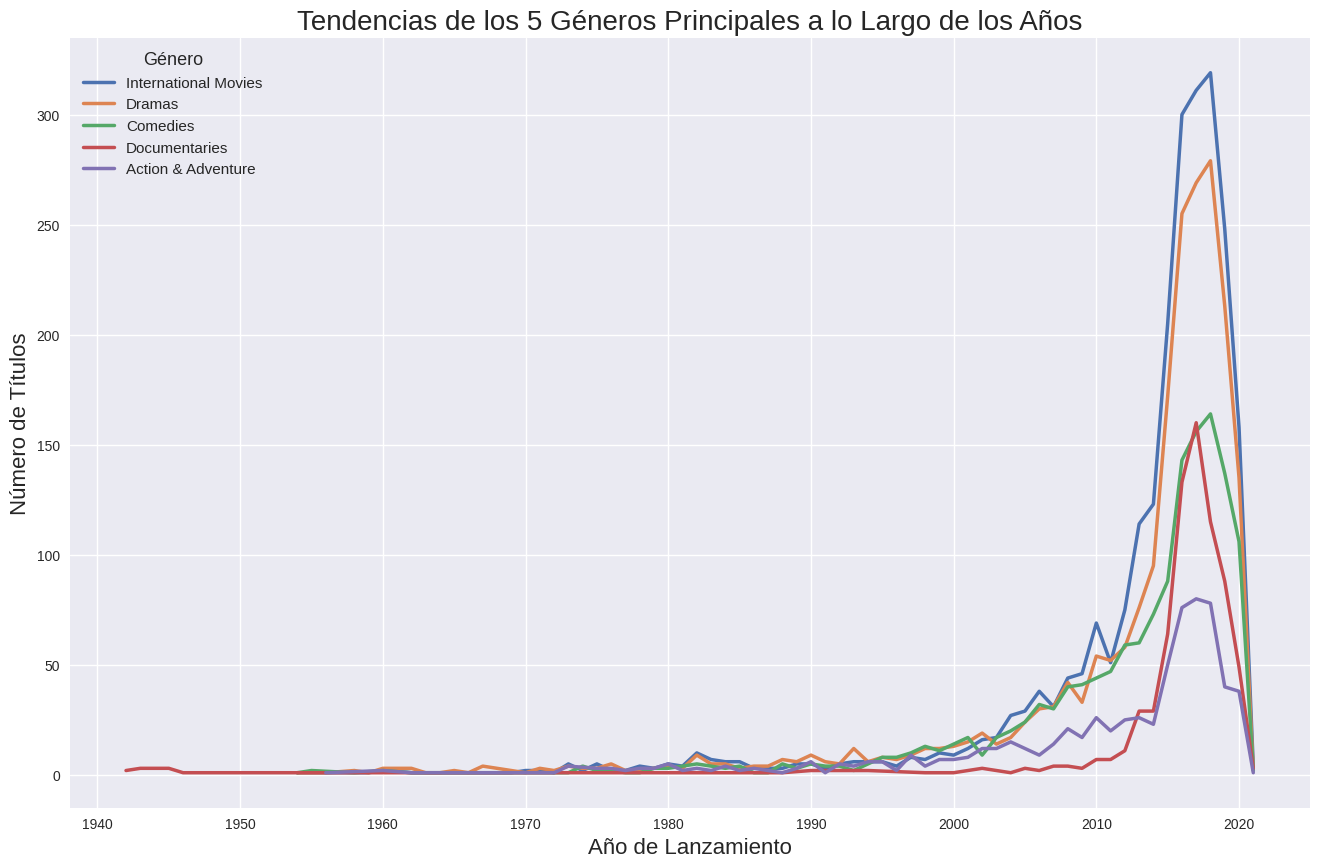

In [67]:
# Se procesa la columna de géneros
df['genres'] = df['genres'].str.split(', ')
genres_df = df.explode('genres')

top_genres = genres_df['genres'].value_counts().nlargest(5).index

plt.figure(figsize=(16, 10))
for genre in top_genres:
    genre_data = genres_df[genres_df['genres'] == genre].groupby('release_year').size()
    plt.plot(genre_data.index, genre_data.values, label=genre, linewidth=2.5)

plt.title('Tendencias de los 5 Géneros Principales a lo Largo de los Años', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=16)
plt.ylabel('Número de Títulos', fontsize=16)
plt.legend(title='Género', title_fontsize='13', fontsize='11')
plt.show()



---

## INTERACTIVOS

### 1. Gráfico de dispersión interactivo: Año de lanzamiento vs Duración

In [77]:
fig = px.scatter(df, x='release_year', y='duration', color='type',
                 hover_data=['title', 'rating'],
                 title='Duración de películas/series por año de lanzamiento',
                 labels={'release_year': 'Año de lanzamiento', 'duration': 'Duración (minutos)', 'type': 'Tipo'})
fig.show()

### 2. Gráfico de barras interactivo: Top 10 países con más producciones

In [80]:
top_countries = df['country'].value_counts().nlargest(10)
fig = px.bar(top_countries, x=top_countries.index, y=top_countries.values,
             title='Top 10 países con más producciones',
             labels={'country': 'País', 'y': 'Número de producciones'})
fig.show()

### 3. Gráfico de pastel interactivo: Distribución de tipos (película/serie)

In [71]:
fig = px.pie(df, names='type', title='Distribución de películas y series')
fig.show()

### 4. Histograma interactivo: Distribución de calificaciones numéricas

In [84]:
fig = px.histogram(df, x='rating_numeric', nbins=20,
                   title='Distribución de calificaciones',
                   labels={'rating_numeric': 'Calificación'})
fig.show()


### 5. Gráfico de líneas interactivo: Tendencia de producciones por año

In [85]:
yearly_counts = df['release_year'].value_counts().sort_index()
fig = px.line(x=yearly_counts.index, y=yearly_counts.values,
              title='Tendencia de producciones por año',
              labels={'x': 'Año','y': 'Produciones'})
fig.show()

### 6. Gráfico de caja interactivo: Duración por tipo de contenido

In [86]:
fig = px.box(df, x='type', y='duration',
             title='Distribución de duración por tipo de contenido',
              labels={'type': 'Tipo','duration': 'Duración'})
fig.show()

### 7. Mapa de calor interactivo: Correlación entre variables numéricas

In [75]:
numeric_df = df[['release_year', 'duration', 'rating_numeric']]
corr_matrix = numeric_df.corr()
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                                x=corr_matrix.columns,
                                y=corr_matrix.columns,
                                colorscale='Viridis'))
fig.update_layout(title='Mapa de calor de correlaciones')
fig.show()